In [234]:
from mpl_toolkits.basemap import Basemap
from matplotlib import path
import numpy as np
import matplotlib.pyplot as plt
import cmocean

etopo = np.load('etopo_15.npy')

In [235]:
p = path.Path([(130,-10.8), (112,-22), (115,-35.5), (132.6,-33.7), (146.6,-41), (155,-28), (143,-10), (130, -10.8)])

#store lon/lat as tuple pairs
tmp = np.array((etopo[:,0],etopo[:,1])).T
#Produce a mask identifying points inside the polygon
mask = p.contains_points(tmp)

#Our mask can also be used to identify points outside the polygon
#Set values of etopo[0,2] to nan if outside polygon
etopo[~mask,2] = np.nan
#print(etopo)

#################### Format Data for plotting
#Obtain the number of unique elements in etopo[:,?]
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

#Using the numpy function reshape our 1D array is transformed into a 2D array
#We then take it's transpose *.t
#Note, this assumes the data was stored in a particular order
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T


################### Analyze region
#number of elements in polygon
#~np.isnan(...) is a masked used to identify elements that are not nan
nume = etopo[~np.isnan(etopo[:,2]),2].size
#print(nume)

#Finda topography greater than -200 m 
#again etopo[...] >= -200 is a mask to identify elements greater than -200
#above_neg200 = etopo[etopo[:,2] >= -200,2]
above_neg200 = topo2[topo2 >= -200]
lat_neg200 = lat2[topo2 >= -200]
lon_neg200 = lon2[topo2 >= -200]
print(lon_neg200)
print(lat_neg200)
print(above_neg200)
#above20 = etopo[etopo[:,2] >= 20.0,2].size
#above50 = etopo[etopo[:,2] >= 50.0,2].size

#print("Percent above -200 m: ",(100*above_neg200/nume))
#print("Percent above 20 m: ",(100*above20/nume))
#print("Percent above 50 m: ",(100*above50/nume))

[146.38 146.62 145.88 ... 142.38 142.62 142.88]
[-40.88 -40.88 -40.62 ... -10.12 -10.12 -10.12]
[-21. -66. -67. ...  -4.  -5.  -5.]


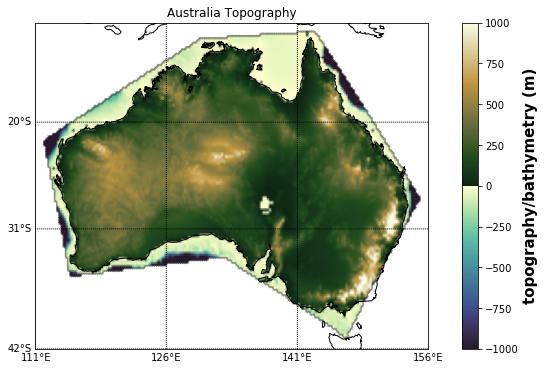

In [236]:
################### Plot region
##Create basemap with crude resolution coastlines
plt.figure(figsize=(12,6))
#map region
#Our polygon,p, is stored in a path data structure.
#we can access its points through the attribute vertices
llat = p.vertices[:,1].min()-1
ulat = p.vertices[:,1].max()+1
llon = p.vertices[:,0].min()-1
ulon = p.vertices[:,0].max()+1
tslat = np.mean([llat, ulat])
#Construct a map with a mercator project
m1 = Basemap(projection='merc',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,lat_ts=tslat,resolution='l')
m1.drawcoastlines()

#Add lat/lon lines and labels
m1.drawparallels(np.linspace(llat,ulat,4), labels=[True,False,False,False])
m1.drawmeridians(np.linspace(llon,ulon,4), labels=[False,False,False,True])

#Add data
m1.pcolormesh(lon2,lat2,topo2,shading='gouraud',cmap = cmocean.cm.topo,latlon=True)

#Set colormap parameters
plt.clim(-1000,1000)
cb = plt.colorbar().set_label(label='topography/bathymetry (m)',size=15,weight='bold')

#Add title
plt.title('Australia Topography')

#Show plot
plt.show()




In [237]:
aboveneg200 = etopo[etopo[:,2] >= -200,2]
print(aboveneg200)



[-102. -144.  -79. ...  -91.  -66. -195.]


In [238]:
elevrange = np.where(etopo[:,2] >= -200)

aus_elev = etopo[elevrange]
print(aus_elev)
print(len(aus_elev))


#move nparray to pandas dataframe 
import pandas as pd

columns = ['longitude', 'latitude', 'elevation']
df = pd.DataFrame(data=aus_elev, columns=columns, dtype='float')
df.head()

[[ 112.62  -24.62 -102.  ]
 [ 112.62  -24.38 -144.  ]
 [ 112.88  -25.88  -79.  ]
 ...
 [ 153.62  -26.38  -91.  ]
 [ 153.62  -26.12  -66.  ]
 [ 153.88  -28.62 -195.  ]]
13181


,longitude,latitude,elevation
0,112.62,-24.62,-102.0
1,112.62,-24.38,-144.0
2,112.88,-25.88,-79.0
3,112.88,-25.62,-34.0
4,112.88,-25.38,-99.0


In [239]:
#find cumulative area per elevation
    #need to make bins for each elev step that contain 
    #lat/lon data 

#interval_range = pd.interval_range(start=-200, freq=1, end=1686)
#df['topo_bin'] = pd.cut(df['topography'], bins=interval_range)
#print(df.head())

df['topo_bins'] = pd.qcut(df['elevation'], q=100)
df.head()


,longitude,latitude,elevation,topo_bins
0,112.62,-24.62,-102.0,"(-106.2, -84.0]"
1,112.62,-24.38,-144.0,"(-198.001, -106.2]"
2,112.88,-25.88,-79.0,"(-84.0, -68.0]"
3,112.88,-25.62,-34.0,"(-37.0, -34.0]"
4,112.88,-25.38,-99.0,"(-106.2, -84.0]"


In [240]:
#counts of values per elevation bin 
counts = df['topo_bins'].value_counts(sort=False)
print(counts)

(-198.001, -106.2]    132
(-106.2, -84.0]       137
(-84.0, -68.0]        131
(-68.0, -54.0]        140
(-54.0, -47.0]        128
                     ... 
(575.0, 604.0]        133
(604.0, 647.0]        129
(647.0, 708.0]        132
(708.0, 828.0]        132
(828.0, 1686.0]       131
Name: topo_bins, Length: 100, dtype: int64


In [241]:
#maximum elevation 
elev_max = df['elevation'].max()
print(elev_max)

1686.0


In [242]:
#unique values of elevation
elev_list = df.elevation.unique()
#print(elev_list)
print(len(elev_list))

1070


In [243]:
#convert elevation data to percent 
# percent = (elevation / (max-min))*100 
df['percent_elev'] = ((df.elevation / (elev_max-(-200))) * 100)
df.head()



,longitude,latitude,elevation,topo_bins,percent_elev
0,112.62,-24.62,-102.0,"(-106.2, -84.0]",-5.408271
1,112.62,-24.38,-144.0,"(-198.001, -106.2]",-7.635207
2,112.88,-25.88,-79.0,"(-84.0, -68.0]",-4.188759
3,112.88,-25.62,-34.0,"(-37.0, -34.0]",-1.802757
4,112.88,-25.38,-99.0,"(-106.2, -84.0]",-5.249205


In [244]:
elev = np.linspace(-200,1686,100)

percent_elev = np.zeros(elev.shape)

for i in range(elev.size):
    temp = df.elevation[df.elevation <= elev[i]] 
    percent_elev[i] = (temp.size/df.elevation.size)*100

print(percent_elev)



[  0.           0.11380017   0.21242698   0.42485396   0.72832107
   1.06972157   1.94977619   3.14847128   4.91616721   8.9522798
  13.22357939  18.20802671  20.66611031  23.47318109  26.18921174
  29.64873682  32.91859495  36.51468022  40.0424854   43.49442379
  47.09050907  50.22380699  53.62263865  57.20355057  60.58720886
  63.35634626  66.06479023  68.96290115  71.27683787  73.76526819
  76.22335179  78.65108869  81.16227904  83.37758895  85.48668538
  87.73992869  89.46969122  90.97185343  92.20848191  93.2706168
  94.3630984   95.30384645  95.88802064  96.38874137  96.76048858
  97.17775586  97.48122297  97.80745012  98.11091723  98.32334421
  98.51301115  98.62681132  98.77854488  98.91510508  99.00614521
  99.08201199  99.14270541  99.23374554  99.30202564  99.34754571
  99.40823913  99.46134588  99.50686594  99.54479933  99.56755937
  99.59790608  99.61307943  99.64342614  99.68894621  99.71170624
  99.74205296  99.77998634  99.81791973  99.83309309  99.8634398
  99.87861316

## Cumulative Area per Elevation of Australia

Text(0, 0.5, 'Elevation')

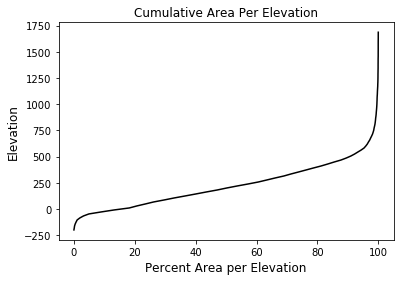

In [245]:


plt.plot(percent_elev, elev, c='k')
plt.title('Cumulative Area Per Elevation', size=12)
plt.xlabel('Percent Area per Elevation', size=12)
plt.ylabel('Elevation', size=12)

## Topographic map of NW Australia



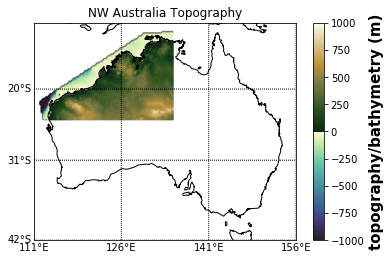

In [246]:
#print(etopo)
W = etopo[etopo[:,0] <= 135]
#print(W)

NW = W[W[:,1] > -25]
#print(NW)
num1 = np.unique(NW[:,0]).size
num2 = np.unique(NW[:,1]).size

lon3 = np.reshape(NW[:,0],(num1,num2)).T
lat3 = np.reshape(NW[:,1],(num1,num2)).T
topo3 = np.reshape(NW[:,2],(num1,num2)).T

m1 = Basemap(projection='merc',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,lat_ts=tslat,resolution='l')
m1.drawcoastlines()
#Add lat/lon lines and labels
m1.drawparallels(np.linspace(llat,ulat,4), labels=[True,False,False,False])
m1.drawmeridians(np.linspace(llon,ulon,4), labels=[False,False,False,True])
#Add data
m1.pcolormesh(lon3, lat3, topo3,shading='gouraud',cmap = cmocean.cm.topo,latlon=True)
#Set colormap parameters
plt.clim(-1000,1000)
cb = plt.colorbar().set_label(label='topography/bathymetry (m)',size=15,weight='bold')
plt.title('NW Australia Topography')
plt.show()



## Cumulative Area per Elevation - NW Australia

   longitude  latitude  elevation           topo_bins  percent_elev
0     112.62    -24.62     -102.0     (-106.2, -84.0]     -5.408271
1     112.62    -24.38     -144.0  (-198.001, -106.2]     -7.635207
2     112.88    -25.88      -79.0      (-84.0, -68.0]     -4.188759
3     112.88    -25.62      -34.0      (-37.0, -34.0]     -1.802757
4     112.88    -25.38      -99.0     (-106.2, -84.0]     -5.249205
   longitude  latitude  elevation           topo_bins  percent_elev
0     112.62    -24.62     -102.0     (-106.2, -84.0]     -5.408271
1     112.62    -24.38     -144.0  (-198.001, -106.2]     -7.635207
2        NaN       NaN        NaN                 NaN           NaN
3        NaN       NaN        NaN                 NaN           NaN
4        NaN       NaN        NaN                 NaN           NaN
   longitude  latitude  elevation        topo_bins  percent_elev
0        NaN       NaN        NaN              NaN           NaN
1        NaN       NaN        NaN              NaN    

Text(0, 0.5, 'Elevation')

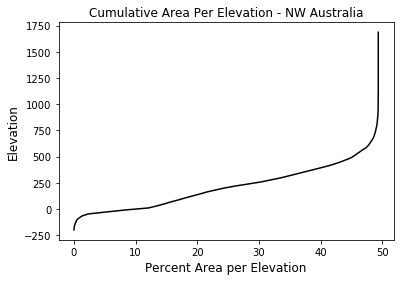

In [247]:
east = df.where(df.longitude <= 135)
print(east.head())
nw = df.where(df.latitude > -25)
print(nw.head())
sw = df.where(df.latitude < -25)
print(sw.head())

elev = np.linspace(-200,1686,100)

percent_elev = np.zeros(elev.shape)

for i in range(elev.size):
    temp = nw.elevation[nw.elevation <= elev[i]] 
    percent_elev[i] = (temp.size/nw.elevation.size)*100

#print(percent_elev)


plt.plot(percent_elev, elev, c='k')
plt.title('Cumulative Area Per Elevation - NW Australia', size=12)
plt.xlabel('Percent Area per Elevation', size=12)
plt.ylabel('Elevation', size=12)

## Topographical map of SW Australia

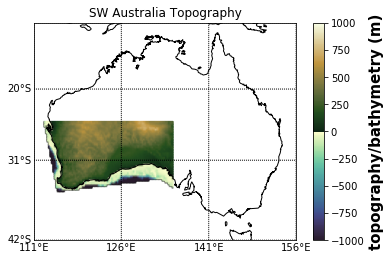

In [248]:


W = etopo[etopo[:,0] <= 135]
#print(W)

SW = W[W[:,1] < -25]
#print(SW)
num1 = np.unique(SW[:,0]).size
num2 = np.unique(SW[:,1]).size

lon4 = np.reshape(SW[:,0],(num1,num2)).T
lat4 = np.reshape(SW[:,1],(num1,num2)).T
topo4 = np.reshape(SW[:,2],(num1,num2)).T

m1 = Basemap(projection='merc',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,lat_ts=tslat,resolution='l')
m1.drawcoastlines()
#Add lat/lon lines and labels
m1.drawparallels(np.linspace(llat,ulat,4), labels=[True,False,False,False])
m1.drawmeridians(np.linspace(llon,ulon,4), labels=[False,False,False,True])
#Add data
m1.pcolormesh(lon4, lat4, topo4,shading='gouraud',cmap = cmocean.cm.topo,latlon=True)
#Set colormap parameters
plt.clim(-1000,1000)
cb = plt.colorbar().set_label(label='topography/bathymetry (m)',size=15,weight='bold')
plt.title('SW Australia Topography')
plt.show()



## Cumulative Area per Elevation - SW Australia

Text(0, 0.5, 'Elevation')

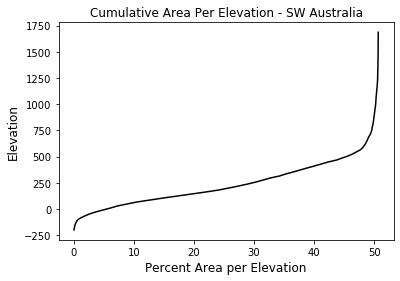

In [249]:
elev = np.linspace(-200,1686,100)

percent_elev = np.zeros(elev.shape)

for i in range(elev.size):
    temp = sw.elevation[sw.elevation <= elev[i]] 
    percent_elev[i] = (temp.size/sw.elevation.size)*100

#print(percent_elev)


plt.plot(percent_elev, elev, c='k')
plt.title('Cumulative Area Per Elevation - SW Australia', size=12)
plt.xlabel('Percent Area per Elevation', size=12)
plt.ylabel('Elevation', size=12)

The majority of the elevations for the low-lying of N&S western are at an elevation between 0-250m with the northern portion containing more high-toporgraphy regions. If these areas + the shelves down to -200m had been inundated during the miocene then the paleo shoreline might reside at 250m or higher. In the southern portion there may be subsistence that places the paleo shoreline lower topographically in relation to the NW region.
